In [2]:
import pandas as pd

df = pd.read_csv("wnba_box_scores_merge.csv")

df.head()


,game_id,season,season_type,game_date,game_date_time,team_id,team_uid,team_slug,team_location,team_name,...,opponent_team_display_name,opponent_team_short_display_name,opponent_team_color,opponent_team_alternate_color,opponent_team_logo,opponent_team_score,largest_lead,fast_break_points,points_in_paint,turnover_points
0,300916020,2010,3,2010-09-16,2010-09-17T00:00:00Z,14,s:40~l:59~t:14,seattle-storm,Seattle,Storm,...,Atlanta Dream,Dream,d02030,383a37,https://a.espncdn.com/i/teamlogos/wnba/500/atl...,84,NaN,NaN,NaN,NaN
1,300916020,2010,3,2010-09-16,2010-09-17T00:00:00Z,20,s:40~l:59~t:20,atlanta-dream,Atlanta,Dream,...,Seattle Storm,Storm,05452a,f7c43c,https://a.espncdn.com/i/teamlogos/wnba/500/sea...,87,NaN,NaN,NaN,NaN
2,300914014,2010,3,2010-09-14,2010-09-15T01:00:00Z,20,s:40~l:59~t:20,atlanta-dream,Atlanta,Dream,...,Seattle Storm,Storm,05452a,f7c43c,https://a.espncdn.com/i/teamlogos/wnba/500/sea...,87,NaN,NaN,NaN,NaN
3,300914014,2010,3,2010-09-14,2010-09-15T01:00:00Z,14,s:40~l:59~t:14,seattle-storm,Seattle,Storm,...,Atlanta Dream,Dream,d02030,383a37,https://a.espncdn.com/i/teamlogos/wnba/500/atl...,84,NaN,NaN,NaN,NaN
4,300912014,2010,3,2010-09-12,2010-09-12T19:00:00Z,20,s:40~l:59~t:20,atlanta-dream,Atlanta,Dream,...,Seattle Storm,Storm,05452a,f7c43c,https://a.espncdn.com/i/teamlogos/wnba/500/sea...,79,NaN,NaN,NaN,NaN


In [3]:
df.info()
df.describe()
df.isnull().sum()

df["team_name"].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9970 entries, 0 to 9969
Data columns (total 57 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   game_id                            9970 non-null   int64  
 1   season                             9970 non-null   int64  
 2   season_type                        9970 non-null   int64  
 3   game_date                          9970 non-null   object 
 4   game_date_time                     9970 non-null   object 
 5   team_id                            9970 non-null   int64  
 6   team_uid                           9970 non-null   object 
 7   team_slug                          9970 non-null   object 
 8   team_location                      9970 non-null   object 
 9   team_name                          9970 non-null   object 
 10  team_abbreviation                  9970 non-null   object 
 11  team_display_name                  9970 non-null   objec

array(['Storm', 'Dream', 'Liberty', 'Mercury', 'Fever', 'Sparks',
       'Silver Stars', 'Mystics', 'Lynx', 'Sun', 'Sky', 'Shock',
       'Team Usa', 'Team WNBA', 'Monarchs', 'Comets', 'Sting', 'East',
       'West', 'Stars', 'Wings', 'Rockers', 'Aces', 'Team Delle Donne',
       'Team Wilson', 'Team USA', 'Team Parker', 'Team Stewart'],
      dtype=object)

In [4]:
df = df.drop(columns=["fast_break_points", "points_in_paint", "turnover_points", "largest_lead",
                       "team_color", "team_alternate_color", "team_logo", "opponent_team_color",
       "opponent_team_alternate_color", "opponent_team_logo",
       "opponent_team_score"])


In [5]:
df.columns

Index(['game_id', 'season', 'season_type', 'game_date', 'game_date_time',
       'team_id', 'team_uid', 'team_slug', 'team_location', 'team_name',
       'team_abbreviation', 'team_display_name', 'team_short_display_name',
       'team_home_away', 'team_score', 'team_winner', 'assists', 'blocks',
       'defensive_rebounds', 'field_goal_pct', 'field_goals_made',
       'field_goals_attempted', 'flagrant_fouls', 'fouls', 'free_throw_pct',
       'free_throws_made', 'free_throws_attempted', 'offensive_rebounds',
       'steals', 'team_turnovers', 'technical_fouls',
       'three_point_field_goal_pct', 'three_point_field_goals_made',
       'three_point_field_goals_attempted', 'total_rebounds',
       'total_technical_fouls', 'total_turnovers', 'turnovers',
       'opponent_team_id', 'opponent_team_uid', 'opponent_team_slug',
       'opponent_team_location', 'opponent_team_name',
       'opponent_team_abbreviation', 'opponent_team_display_name',
       'opponent_team_short_display_name'],

In [6]:
df["team_name"].unique()



array(['Storm', 'Dream', 'Liberty', 'Mercury', 'Fever', 'Sparks',
       'Silver Stars', 'Mystics', 'Lynx', 'Sun', 'Sky', 'Shock',
       'Team Usa', 'Team WNBA', 'Monarchs', 'Comets', 'Sting', 'East',
       'West', 'Stars', 'Wings', 'Rockers', 'Aces', 'Team Delle Donne',
       'Team Wilson', 'Team USA', 'Team Parker', 'Team Stewart'],
      dtype=object)

In [14]:
win_rates = df.groupby(["season","team_name"])["team_winner"].mean()
win_rates = win_rates.reset_index().rename(columns={"team_winner": "win_percentage"})
win_rates.head()

,season,team_name,win_percentage
0,2003,Comets,0.642857
1,2003,East,0.000000
2,2003,Fever,0.482759
3,2003,Liberty,0.238095
4,2003,Lynx,0.551724


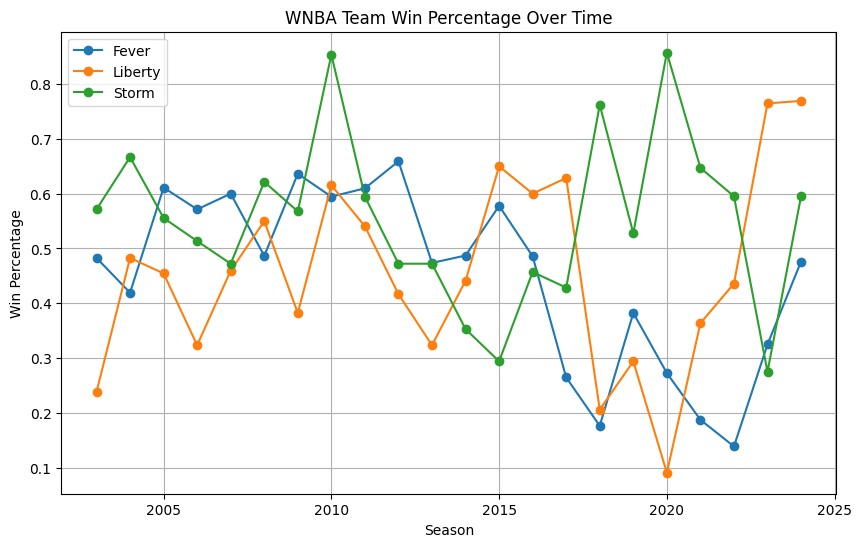

In [17]:

import matplotlib.pyplot as plt  

teams_to_plot = ["Fever", "Liberty", "Storm"]
plt.figure(figsize=(10,6)) 

for team in teams_to_plot:
    team_data = win_rates[win_rates["team_name"] == team] 
    plt.plot(team_data["season"], team_data["win_percentage"], marker='o', linestyle='-', label=team)  

plt.xlabel("Season")  
plt.ylabel("Win Percentage")  
plt.title("WNBA Team Win Percentage Over Time")
plt.legend()
plt.grid(True)  
plt.show()


In [16]:
win_rates["team_name"].unique()

array(['Comets', 'East', 'Fever', 'Liberty', 'Lynx', 'Mercury',
       'Monarchs', 'Mystics', 'Rockers', 'Shock', 'Silver Stars',
       'Sparks', 'Sting', 'Storm', 'Sun', 'West', 'Sky', 'Dream',
       'Team Usa', 'Team WNBA', 'Stars', 'Wings', 'Aces',
       'Team Delle Donne', 'Team Parker', 'Team Wilson', 'Team Stewart',
       'Team USA'], dtype=object)